## Import the necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import interp
from itertools import cycle
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

## Load the File

In [ ]:
file_path = '/content/sample_data/creditcard.csv'
df = pd.read_csv(file_path)

# Data Preprocessing

## Display the first few rows of the DataFrame

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(21878, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64
 19  V19     21878 non-null  float64
 20  V20     21878 non-null  float64
 21  V21     21878 non-null  float64
 22

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,...,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21877.000000,21877.000000
mean,16924.271551,-0.241060,0.222124,0.737915,0.262153,-0.175227,0.087496,-0.141011,0.019339,0.562079,...,-0.043038,-0.140156,-0.037826,0.010707,0.125683,0.029305,0.011978,0.006293,71.725300,0.003931
std,11005.409549,1.880901,1.518111,1.740947,1.451072,1.414872,1.322606,1.323924,1.383927,1.277273,...,0.849611,0.644914,0.512947,0.590807,0.436855,0.524399,0.395178,0.247253,205.034501,0.062576
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,5496.250000,-0.960913,-0.350012,0.298029,-0.649075,-0.756733,-0.660688,-0.597972,-0.169171,-0.273362,...,-0.257010,-0.564567,-0.175530,-0.331558,-0.136296,-0.339574,-0.067305,-0.010143,5.990000,0.000000
50%,18770.500000,-0.299205,0.206484,0.888730,0.222271,-0.210143,-0.176618,-0.069763,0.026032,0.515162,...,-0.109913,-0.111903,-0.048576,0.062115,0.163900,-0.042054,0.005402,0.019665,17.430000,0.000000
75%,27778.750000,1.164867,0.858497,1.520365,1.132694,0.332839,0.481047,0.447633,0.281472,1.330385,...,0.059938,0.267688,0.074156,0.399318,0.404503,0.320185,0.095819,0.077587,62.390000,0.000000
max,31907.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


In [ ]:
# sns.pairplot(df,hue='Class',palette='Set1')

## Handing missing values using SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy to replace missing values with the mean

imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the DataFrame and transform the data to fill missing values
# Convert the result back to a DataFrame with the original columns
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Missing values after imputation:\n", df_imputed.isnull().sum())

Missing values after imputation:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Determine number of fraud cases in dataset

In [ ]:
fraud = df_imputed[df_imputed['Class'] == 1]
valid = df_imputed[df_imputed['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))

print(f'Outlier Fraction: {outlierFraction}')
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

# randomize the datasets
fraud = fraud.sample(frac=1).reset_index(drop=True)
valid = valid.sample(frac=1).reset_index(drop=True)

# Combine back the randomized datasets
df_randomized = pd.concat([fraud, valid]).sample(frac=1).reset_index(drop=True)

Outlier Fraction: 0.003946583451883806
Fraud Cases: 86
Valid Transactions: 21791


#### Printing amount details of fraud transactions

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count      86.000000
mean       93.996860
std       260.195133
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

#### Printing amount details of normal transactions

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    21791.000000
mean        71.637403
std        204.790148
min          0.000000
25%          5.990000
50%         17.500000
75%         62.120000
max       7879.420000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

## Correlation matrix

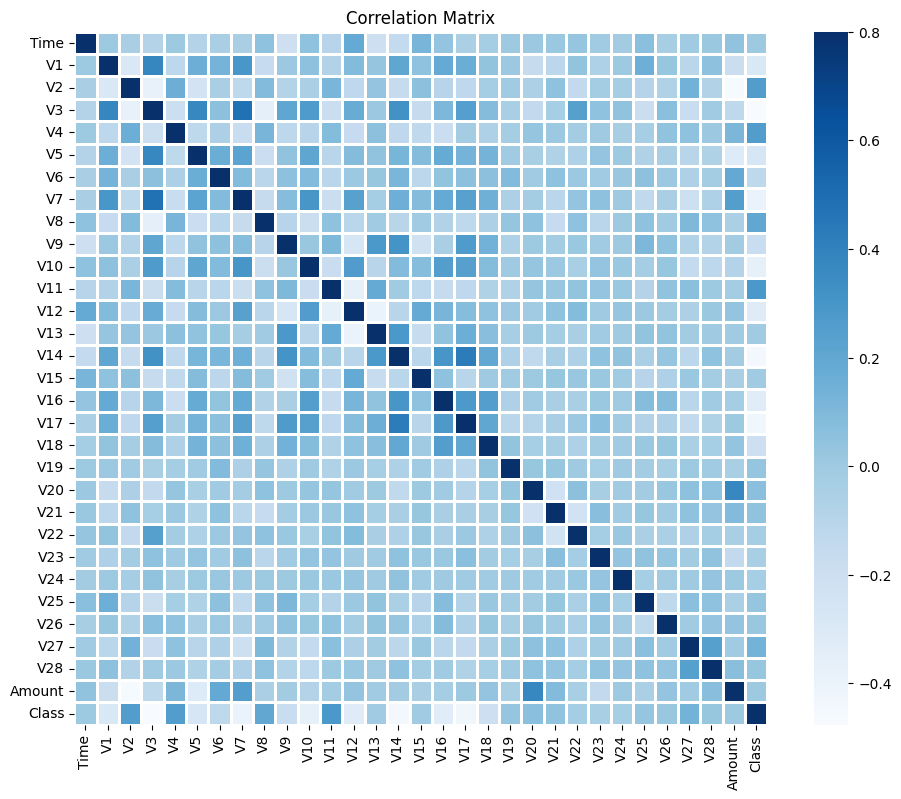

In [ ]:
# Calculate the correlation matrix
corrmat = df.corr()

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 9))

# Create a heatmap of the correlation matrix with specified figure size
sns.heatmap(corrmat, vmax=.8, square=True, cmap='Blues',linewidths=0.75, linecolor='white')
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = df_randomized.drop('Class', axis=1).astype(float)
Y = df_randomized['Class'].astype(int)
print(X.shape)
print(Y.shape)

# (5974, 30) (5974, )

(21877, 30)
(21877,)


In [ ]:
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y

## Train Test and Split

In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.3, random_state = 42, stratify=yData)

In [ ]:
from sklearn.impute import SimpleImputer # Import imputer to handle missing values

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Handle any potential missing values in train/test sets separately
# Impute missing values in X_train and X_test using the mean
X_train_imputed = imputer.fit_transform(xTrain)
X_test_imputed = imputer.transform(xTest)

# Gradient Boosting Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(xTrain, yTrain)
yPred = gbc.predict(X_test_scaled)

# Print results
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred))

Gradient Boosting Classifier
Accuracy: 0.9980195003046922
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6538
           1       0.81      0.65      0.72        26

    accuracy                           1.00      6564
   macro avg       0.90      0.83      0.86      6564
weighted avg       1.00      1.00      1.00      6564



In [ ]:
# from sklearn.metrics import plot_confusion_matrix # Import the correct function

# plt.figure(figsize=(8, 8))
# plot_model(gbc, plot='class_report')

### Confusion Matrix

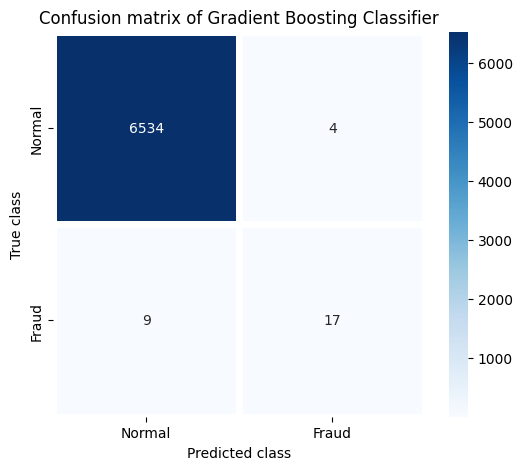

In [ ]:
from sklearn.metrics import confusion_matrix # Import confusion matrix

# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d", cmap='Blues', linewidths=5);
plt.title("Confusion matrix of Gradient Boosting Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()